<h1>All Respondents Analysis with Grades</h1>

<h2>Read All Respondents Data</h2>

In [24]:
import os
import pandas as pd

# Specify the folder path where the CSV files are located
folder_path = "all respondents data"

# Initialize an empty dataframe to store the combined data
combined_data = pd.DataFrame()

# Loop through each file in the folder with .csv extension and append to the combined_data dataframe
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, low_memory=False)
        respondent_num = filename.split('_')[0]  # Get the first part of the filename before the first '_'
        df['Respondent'] = respondent_num  # Add a new column with the respondent number
        combined_data = pd.concat([combined_data, df])

columns_to_remove = ['Row','Timestamp','EventSource','SlideEvent','StimType','Duration',
                     'CollectionPhase','SourceStimuliName','EventSource','SampleNumber','EventSource.1',
                     'Blink', 'BlinkRate', 'EventSource.2', 'ET_TimeSignal', 'EventSource.3']
combined_data.drop(columns_to_remove, axis=1, inplace=True)

# Print the combined data
print(combined_data)


           Anger  Contempt   Disgust      Fear       Joy   Sadness  Surprise  \
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
147733       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
147734  0.195341  0.187637  0.027562  0.130503  0.043328  0.117269  0.057809   
147735  0.245047  0.204197  0.028027  0.133038  0.041089  0.118906  0.057576   
147736       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
147737       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        Engagement  Valence  Sentimenta

In [25]:
import pandas as pd

# Read in the Grades.csv file
grades_df = pd.read_csv('Grades.csv')

# Remove the trailing underscore from the "Respondent" column in the grades_df dataframe
grades_df['Respondent'] = grades_df['Respondent'].str.rstrip('_')

# Merge the combined_data and grades_df dataframes based on the "Respondent" column
combined_data_with_grades = pd.merge(combined_data, grades_df[['Respondent', 'Grade']], on='Respondent')

# Print the resulting dataframe with the added "Grade" column
print(combined_data_with_grades)


            Anger  Contempt   Disgust      Fear       Joy   Sadness  Surprise  \
0             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4             NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
1479603       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1479604  0.195341  0.187637  0.027562  0.130503  0.043328  0.117269  0.057809   
1479605  0.245047  0.204197  0.028027  0.133038  0.041089  0.118906  0.057576   
1479606       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1479607       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

         Engagement  Valenc

In [26]:
print(combined_data_with_grades.columns)

Index(['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw', 'Roll',
       'Interocular Distance', 'ET_PupilLeft', 'ET_PupilRight',
       'ET_DistanceLeft', 'ET_DistanceRight', 'ET_GazeLeftx', 'ET_GazeLefty',
       'ET_GazeRightx', 'ET_GazeRighty', 'ET_ValidityLeftEye',
       'ET_ValidityRightEye', 'ET_CameraLeftX', 'ET_CameraLeftY',
       'ET_CameraRightX', 'ET_CameraRightY', 'Gaze X', 'Gaze Y',
       'Interpolated Gaze X', 'Interpolated Gaze Y', 'Interpolated Distance',
       'Gaze Velocity', 'Gaze Acceleration', 'Fixation Index',
       'Fix

<h2>Facial Expressions Analysis</h2>

<h3>Data Pre-processing</h3>

In [27]:
import pandas as pd

facial_expressions_columns = ['Respondent', 'Grade','Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral',
       'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise',
       'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop',
       'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch',
       'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile',
       'Smirk', 'Upper Lip Raise', 'Pitch', 'Yaw',
       'Roll']
# Creating a copy df with only the facial expressions data
facial_expressions_data = combined_data_with_grades[facial_expressions_columns].copy()

# Remove rows with all NaN values, except in the 'Respondent' column
facial_expressions_data = facial_expressions_data.dropna(how='all', 
                                                         subset=facial_expressions_data.columns.difference(['Respondent', 'Grade']))

facial_expressions_data.tail()



,Respondent,Grade,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,...,Lip Suck,Lid Tighten,Mouth Open,Nose Wrinkle,Smile,Smirk,Upper Lip Raise,Pitch,Yaw,Roll
1479598,019,55,0.139795,0.183797,0.026397,0.130016,0.045364,0.117328,0.060181,0.328766,...,0.125971,2.270765,6.647667,0.457276,4.720551,2.773993,0.106491,1.251196,-1.319161,-0.530024
1479600,019,55,0.153553,0.176831,0.026905,0.128566,0.046042,0.116635,0.058846,0.328766,...,0.129171,4.729377,6.861856,0.512176,4.703412,2.382556,0.255912,0.392811,-1.608518,-0.468374
1479602,019,55,0.168653,0.193708,0.027669,0.130344,0.045429,0.117382,0.058326,0.328766,...,0.135208,6.785742,7.472722,0.519497,4.585781,3.149543,0.253990,0.286135,-1.387060,-0.229705
1479604,019,55,0.195341,0.187637,0.027562,0.130503,0.043328,0.117269,0.057809,0.328766,...,0.135131,10.632483,7.365998,0.463937,4.418400,2.717841,0.150040,-1.702013,-1.998969,-0.185392
1479605,019,55,0.245047,0.204197,0.028027,0.133038,0.041089,0.118906,0.057576,0.328766,...,0.144891,16.228485,7.659717,0.376117,4.076993,3.261096,0.070152,-0.172043,-1.711222,-0.415041


<h2>Compare Facial Expressions by Grade Group</h2>

In [58]:

from tabulate import tabulate

# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
facial_expressions_data['Grade Group'] = facial_expressions_data['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')

# Describe statistics for each selected column by grade group
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']


<h2>Table for Each Emotion Describe</h2>

In [45]:
from scipy.stats import ttest_ind
from selenium import webdriver

# create a new Firefox browser window
driver = webdriver.Firefox()

# Define a function to add a star to indicate statistical significance
def add_star(pval):
    if pval < 0.05:
        return '*'
    else:
        return ''

# Loop through the emotions and perform a t-test between the grade groups
for col in selected_columns:
    # Create a DataFrame for the current emotion only
    emotion_data = facial_expressions_data.loc[:, ['Grade Group', col]]

    above_55 = emotion_data.loc[emotion_data['Grade Group'] == 'Above 55', col]
    below_55 = emotion_data.loc[emotion_data['Grade Group'] == 'Below 55', col]
    t, pval = ttest_ind(above_55, below_55, equal_var=True)
    pval_star = add_star(pval)

    # Calculate the statistics for the current emotion
    emotion_stats = emotion_data.groupby('Grade Group')[col].describe()
    emotion_stats['mean_diff'] = emotion_stats['mean'].diff().fillna(0)
    emotion_stats['median_diff'] = emotion_stats['50%'].diff().fillna(0)
    emotion_stats.loc['', 'p-value'] = pval

    # Create a formatted table for the current emotion
    emotion_stats_formatted = emotion_stats.style\
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])\
        .set_caption(col)\
        .format('{:.2f}')\
        .set_properties(**{'width': '50px', 'text-align': 'center'})\
        .set_table_attributes('style="border-collapse: separate; border-spacing: 20px;"')\
        .applymap(lambda x: 'background-color: #f2f2f2' if x == emotion_stats['mean'].max() else '')

    # Display the table for the current emotion
    display(emotion_stats_formatted)

    # Save the table as an HTML file and take a screenshot
    filename = col + '_grades_stats.html'
    emotion_stats_formatted.to_html(filename)
    driver.get('C:\\projects\\classifiers\\' + filename)
    driver.save_screenshot(filename + "_screenshot.png")

# close the browser window
driver.quit()


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.08,3.69,0.00,0.14,0.26,1.06,97.43,0.00,0.00,nan
Below 55,485412.00,2.28,8.04,0.00,0.14,0.30,1.24,95.62,1.20,0.04,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.07,7.13,0.00,0.18,0.19,0.20,98.28,0.00,0.00,nan
Below 55,485412.00,2.63,13.00,0.00,0.19,0.20,0.25,99.89,1.56,0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,0.75,4.92,0.00,0.02,0.04,0.47,99.33,0.00,0.00,nan
Below 55,485412.00,0.45,3.35,0.00,0.03,0.04,0.44,98.88,-0.30,-0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.56,7.54,0.00,0.13,0.21,0.84,99.73,0.00,0.00,nan
Below 55,485412.00,1.33,4.86,0.00,0.14,0.24,0.94,99.46,-0.23,0.02,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,2.34,14.23,0.00,0.02,0.02,0.03,99.98,0.00,0.00,nan
Below 55,485412.00,1.29,10.33,0.00,0.02,0.02,0.03,99.98,-1.04,-0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,0.67,4.48,0.00,0.12,0.13,0.13,98.61,0.00,0.00,nan
Below 55,485412.00,1.24,5.60,0.00,0.13,0.13,0.16,99.03,0.57,0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.78,9.56,0.00,0.06,0.06,0.16,99.99,0.00,0.00,nan
Below 55,485412.00,1.33,6.50,0.00,0.06,0.08,0.32,99.97,-0.45,0.01,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,25.84,32.95,0.00,0.33,1.98,59.18,99.98,0.00,0.00,nan
Below 55,485412.00,26.68,33.89,0.00,0.33,1.57,61.57,99.98,0.84,-0.41,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.37,16.73,-98.87,0.00,0.00,0.00,99.97,0.00,0.00,nan
Below 55,485412.00,-2.19,15.63,-99.75,0.00,0.00,0.00,99.87,-3.56,0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.18,5.31,0.00,0.01,0.07,0.40,99.86,0.00,0.00,nan
Below 55,485412.00,1.17,5.51,0.00,0.01,0.08,0.36,96.00,-0.01,0.00,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.61


,count,mean,std,min,25%,50%,75%,max,mean_diff,median_diff,p-value
Grade Group,,,,,,,,,,,
Above 55,397414.00,1.22,5.75,0.00,0.04,0.12,0.42,99.23,0.00,0.00,nan
Below 55,485412.00,1.87,7.54,0.00,0.03,0.17,0.74,98.83,0.65,0.05,nan
,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


In [30]:
print(facial_expressions_data)

        Respondent  Grade     Anger  Contempt   Disgust      Fear       Joy  \
5              001    100  0.125566  0.186393  0.023706  0.125796  0.025453   
7              001    100  0.125833  0.186909  0.023738  0.126169  0.025312   
9              001    100  0.126258  0.187818  0.023798  0.126605  0.025114   
11             001    100  0.126290  0.188413  0.023834  0.126583  0.024996   
13             001    100  0.126344  0.188792  0.023866  0.126641  0.024909   
...            ...    ...       ...       ...       ...       ...       ...   
1479598        019     55  0.139795  0.183797  0.026397  0.130016  0.045364   
1479600        019     55  0.153553  0.176831  0.026905  0.128566  0.046042   
1479602        019     55  0.168653  0.193708  0.027669  0.130344  0.045429   
1479604        019     55  0.195341  0.187637  0.027562  0.130503  0.043328   
1479605        019     55  0.245047  0.204197  0.028027  0.133038  0.041089   

          Sadness  Surprise  Engagement  ...  Lid T

In [31]:
# from scipy.stats import ttest_ind
# from selenium import webdriver
# import numpy as np

# # create a new Firefox browser window
# driver = webdriver.Firefox()

# # Define a function to perform a bootstrap test between two groups
# def bootstrap_test(group1, group2, n_bootstraps=10000):
#     # Calculate the observed difference in means between the groups
#     obs_diff = np.mean(group1) - np.mean(group2)

#     # Combine the data into a single array
#     combined_data = np.concatenate([group1, group2])

#     # Create an empty array to store the bootstrap replicates
#     bootstrap_diffs = np.zeros(n_bootstraps)

#     # Perform the bootstrap
#     for i in range(n_bootstraps):
#         # Sample with replacement from the combined data
#         sample = np.random.choice(combined_data, size=len(combined_data), replace=True)

#         # Split the sample into two groups
#         bootstrap_group1 = sample[:len(group1)]
#         bootstrap_group2 = sample[len(group1):]

#         # Calculate the difference in means between the bootstrap groups
#         bootstrap_diffs[i] = np.mean(bootstrap_group1) - np.mean(bootstrap_group2)

#     # Calculate the p-value
#     pval = (np.sum(bootstrap_diffs >= obs_diff) + np.sum(bootstrap_diffs <= -obs_diff)) / n_bootstraps

#     return pval

# # Loop through the emotions and perform a bootstrap test between the grade groups
# for col in selected_columns:
#     # Create a DataFrame for the current emotion only
#     emotion_data = facial_expressions_data.loc[:, ['Grade Group', col]]

#     above_55 = emotion_data.loc[emotion_data['Grade Group'] == 'Above 55', col]
#     below_55 = emotion_data.loc[emotion_data['Grade Group'] == 'Below 55', col]
#     pval = bootstrap_test(above_55, below_55)

#     # Calculate the statistics for the current emotion
#     emotion_stats = emotion_data.groupby('Grade Group')[col].describe()
#     emotion_stats['mean_diff'] = emotion_stats['mean'].diff().fillna(0)
#     emotion_stats['median_diff'] = emotion_stats['50%'].diff().fillna(0)
#     emotion_stats.loc['', 'p-value'] = pval

#     # Create a formatted table for the current emotion
#     emotion_stats_formatted = emotion_stats.style\
#         .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])\
#         .set_caption(col)\
#         .format('{:.2f}')\
#         .set_properties(**{'width': '50px', 'text-align': 'center'})\
#         .set_table_attributes('style="border-collapse: separate; border-spacing: 20px;"')\
#         .applymap(lambda x: 'background-color: #f2f2f2' if x == emotion_stats['mean'].max() else '')

#     # Display the table for the current emotion
#     display(emotion_stats_formatted)

#     # Save the table as an HTML file and take a screenshot
#     filename = col + '_grades_stats.html'
#     emotion_stats_formatted.to_html(filename)
#     driver.get('C:\\projects\\classifiers\\' + filename)
#     driver.save_screenshot(filename + "_bootstrap_screenshot.png")

# # close the browser window
# driver.quit()


<h2>Correlation Between Emotions and Grade</h2>

C:\Users\user\AppData\Local\Temp\ipykernel_44616\1702634197.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.loc[:, 'Grade Group'] = pd.Categorical(data_to_plot['Grade Group']).codes


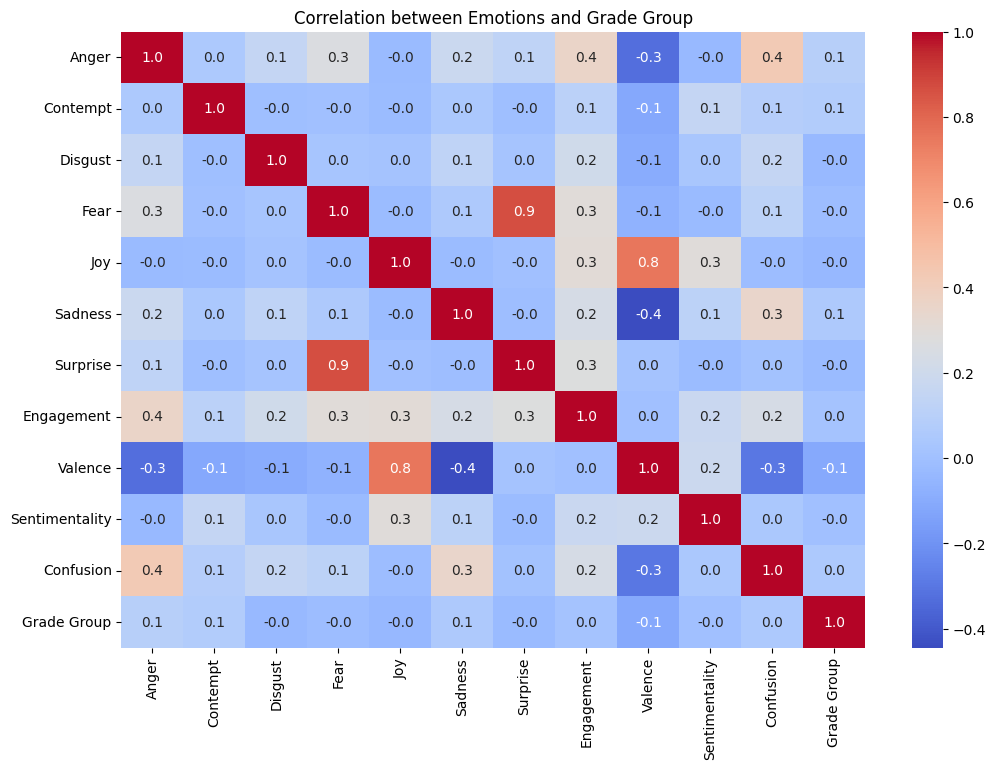

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Grade Group']
# Create a copy of the facial_expressions_data DataFrame
data_to_plot = facial_expressions_data.copy()

# Create a subset of the data with only the selected columns
subset_data = data_to_plot[columns_to_plot]

# Convert the 'Grade Group' column to a categorical variable and encode it as numeric
subset_data.loc[:, 'Grade Group'] = pd.Categorical(data_to_plot['Grade Group']).codes

# Plot a heatmap of the correlations between each emotion and the grade group
plt.figure(figsize=(12, 8))
sns.heatmap(subset_data.corr(), cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Correlation between Emotions and Grade Group')
plt.show()


<h2>Random Limited Observations for Each Respondent</h2>

In [94]:
import pandas as pd
from scipy.stats import ttest_ind

from tabulate import tabulate

# Add a new column to the combined_data_with_grades dataframe that indicates whether the grade is above or below 55
facial_expressions_data['Grade Group'] = facial_expressions_data['Grade'].apply(lambda x: 'Above 55' if x > 55 else 'Below 55')

# Describe statistics for each selected column by grade group
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Grade Group', 'Respondent']

# Only for selected columns
emotions_data = facial_expressions_data[selected_columns]

# Group the data by the respondent ID and randomly select 1000 observations from each group
sampled_data = emotions_data.groupby('Respondent').apply(lambda x: x.sample(n=1000))

columns_for_calculation = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise',
       'Engagement', 'Valence', 'Sentimentality', 'Confusion']

# Perform the t-test for each column between the two groups
for col in columns_for_calculation:
    above_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Above 55', col]
    below_55 = sampled_data.loc[sampled_data['Grade Group'] == 'Below 55', col]
    t, pval = ttest_ind(above_55, below_55, equal_var=True)
    print(f'{col}: p-value = {pval:.4f}')


Anger: p-value = 0.0000
Contempt: p-value = 0.0000
Disgust: p-value = 0.0000
Fear: p-value = 0.2785
Joy: p-value = 0.0105
Sadness: p-value = 0.0000
Surprise: p-value = 0.0081
Engagement: p-value = 0.0067
Valence: p-value = 0.0000
Sentimentality: p-value = 0.0955
Confusion: p-value = 0.0001
